In [1]:
#import matplotlib and pandas modules
import matplotlib.pyplot as plt
import pandas as pd

#allows plots to be displayed inline
%matplotlib inline

#read raw college majors datafile from 
#five thirty-eight on github into a panda dataframe
data = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/college-majors/recent-grads.csv')

#print(data.describe())

In [2]:
#drop rows containing null values and assign to recent_grads
recent_grads = data.dropna()
print(recent_grads.describe())

             Rank   Major_code          Total            Men          Women  \
count  172.000000   172.000000     172.000000     172.000000     172.000000   
mean    87.377907  3895.953488   39370.081395   16723.406977   22646.674419   
std     49.983181  1679.240095   63483.491009   28122.433474   41057.330740   
min      1.000000  1100.000000     124.000000     119.000000       0.000000   
25%     44.750000  2403.750000    4549.750000    2177.500000    1778.250000   
50%     87.500000  3608.500000   15104.000000    5434.000000    8386.500000   
75%    130.250000  5503.250000   38909.750000   14631.000000   22553.750000   
max    173.000000  6403.000000  393735.000000  173809.000000  307087.000000   

       ShareWomen  Sample_size      Employed      Full_time      Part_time  \
count  172.000000   172.000000     172.00000     172.000000     172.000000   
mean     0.522223   357.941860   31355.80814   26165.767442    8877.232558   
std      0.231205   619.680419   50777.42865   42957.1

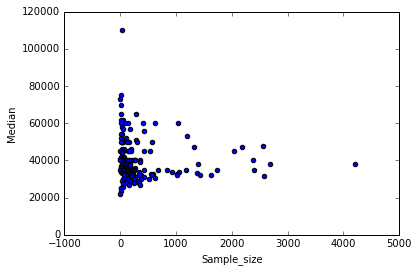

In [3]:
#scatter plot - sample size vs median wage
recent_grads.plot(x='Sample_size', y='Median', kind='scatter')

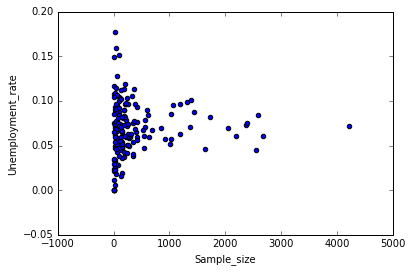

In [4]:
#scatter plot - sample size vs unemployment rate
recent_grads.plot(x='Sample_size', y='Unemployment_rate', kind='scatter')

#no significant correlation as expected, as sample size increases
#unemployment rate becomes closer to the median / less variable

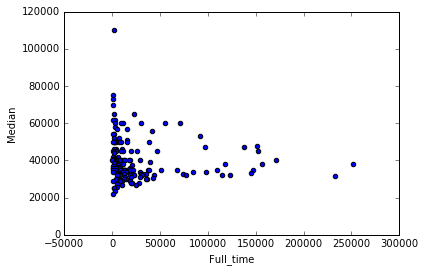

In [5]:
#scatter plot - number employed full time vs median wage
recent_grads.plot(x='Full_time', y='Median', kind='scatter')

#again no significant correlation, as what is essentially sample 
#size (number employed full time) increases, median wage becomes 
#less variable.  There may be a slight downward trend which may
#correlate with less popular fields offering higher pay because
#they have less options

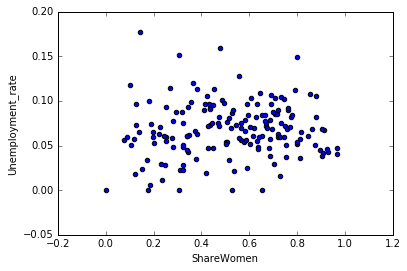

In [6]:
#scatter plot - share of women in field vs unemployment rate
recent_grads.plot(x='ShareWomen', y='Unemployment_rate', kind='scatter')

#from a quick visual inspection it looks like there might be a slight
#upward slope to the trend line but no conclusions drawn yet

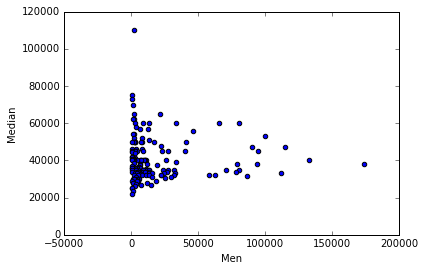

In [7]:
#scatter plot - number men vs median wage
recent_grads.plot(x='Men', y='Median', kind='scatter')

#trend essentially does the same thing as for other measures of sample
#size - as number in sample increases, variation decreases

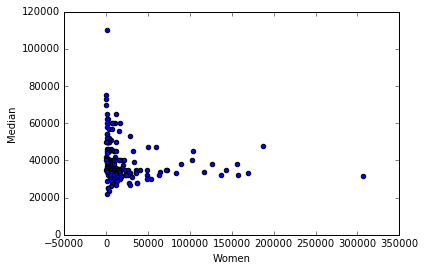

In [8]:
#scatter plot - women vs median wage
recent_grads.plot(x='Women', y='Median', kind='scatter')

#seems to be a slight downward slope to trend line, but for 
#the most part as number of women increases variability is reduced

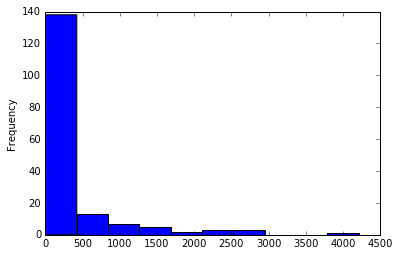

In [9]:
#histogram of sample size
recent_grads['Sample_size'].plot(kind='hist')

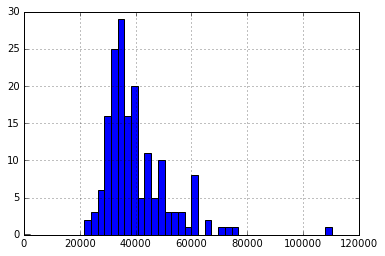

In [10]:
#histogram of median wage
recent_grads['Median'].hist(bins=50, range=(0,120000))

#median wage most often in 30-45k with an outlier around 110k

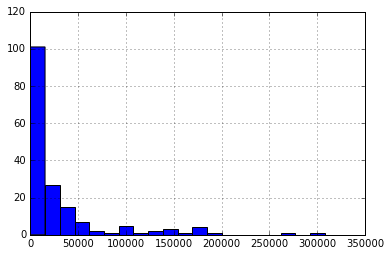

In [11]:
#histogram of number employed
recent_grads['Employed'].hist(bins=20)

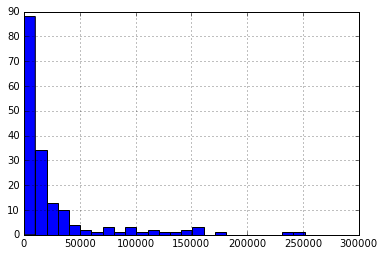

In [12]:
#histogram of number full time
recent_grads['Full_time'].hist(bins=25)

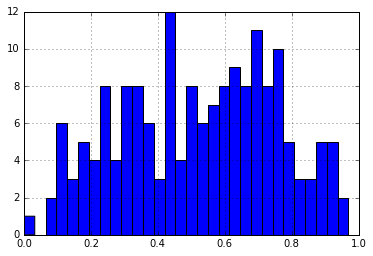

In [13]:
#histogram of share of women in field
recent_grads['ShareWomen'].hist(bins=30)

#distribution is fairly evenly distributed on either side of 0.5 (<0.5
#indicates predominantly male, >0.5 predominantly female) although 
#a box and whiskers plot would be more helpful for this question

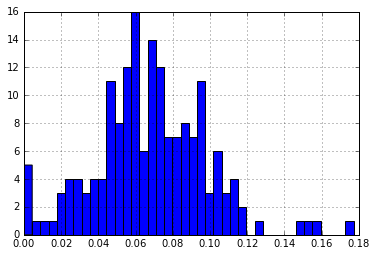

In [14]:
#histogram of number full time
recent_grads['Unemployment_rate'].hist(bins=40)

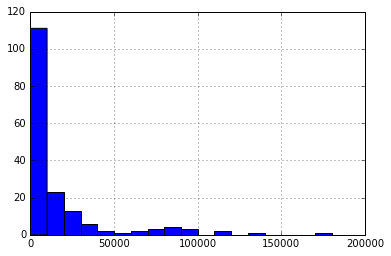

In [15]:
#histogram of number of men
recent_grads['Men'].hist(bins=20, range=(0,200000))

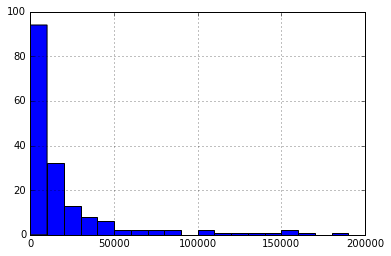

In [16]:
#histogram of number of women
recent_grads['Women'].hist(bins=20, range=(0,200000))
#to compare women vs men range needs to be the same

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb3d2c51f28>,
      dtype=object)

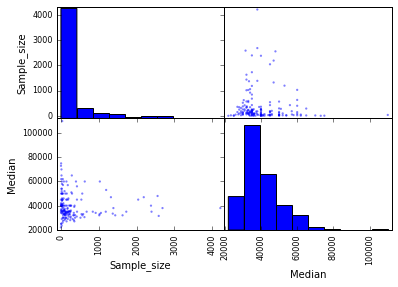

In [18]:
from pandas.plotting import scatter_matrix
scatter_matrix(recent_grads[['Sample_size', 'Median']])

#the densest clusters of points on the scatter plots
#correlate with the mode for both variables

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb3d2c0c828>,
      dtype=object)

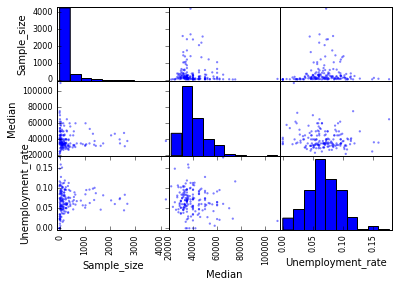

In [19]:
scatter_matrix(recent_grads[['Sample_size', 'Median', 'Unemployment_rate']])

#hard to make any conclusions without trend lines

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb3d1cccbe0>,
      dtype=object)

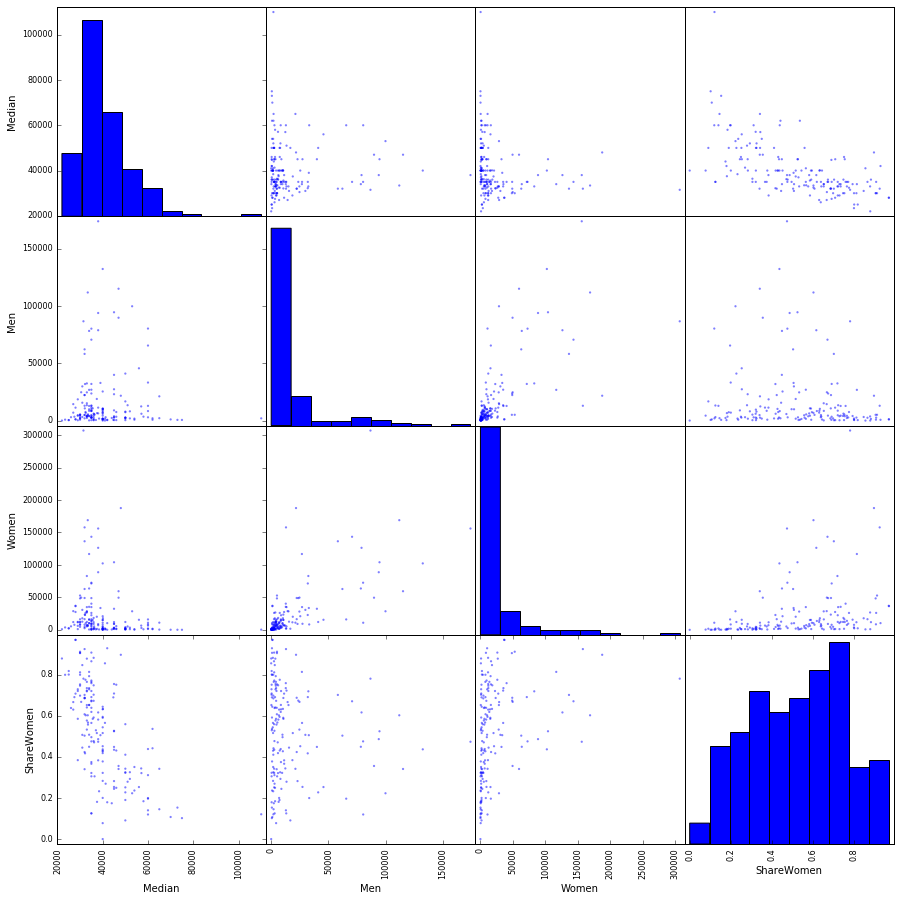

In [22]:
#compare median salary with men, women, sharewomen
scatter_matrix(recent_grads[['Median', 'Men', 'Women', 'ShareWomen']], figsize=(15,15))

#most notable trend from this scatter matrix is that as sharewomen increases, median 
#clearly decreases (upper right hand plot)

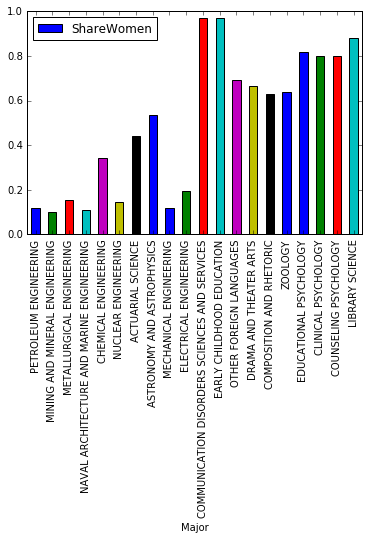

In [39]:
first_last_ten = recent_grads.iloc[[0,1,2,3,4,5,6,7,8,9,162,163,164,165,166,167,168,169,170,171]]
first_last_ten.plot.bar(x='Major', y='ShareWomen')
#appears to be a trend between rank and sharewomen

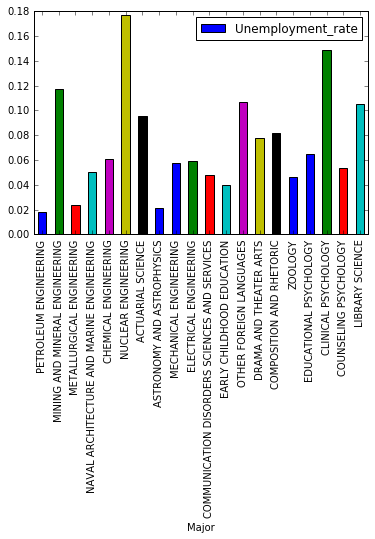

In [40]:
first_last_ten.plot.bar(x='Major', y='Unemployment_rate')

In [71]:
#I want to compare different variables in major categories.  I need to calculate the average 
#of each variable in each category in order to do this.

#list unique values
categories = recent_grads['Major_category'].unique()

#create a dataframe to store averages.  If I want to calculate another variable average, I just add it 
#to the columns list.
columns=['ShareWomen', 'Median']
category_df = pd.DataFrame(columns=columns, index=categories)

#create a boolean for each unique value
for column in columns:
    for category in categories:
        category_bool = recent_grads[recent_grads['Major_category'] == category]
        category_mean = category_bool[column].mean()
        category_df.loc[category, column] = category_mean

print(category_df)

                                    ShareWomen   Median
Engineering                           0.238889  57382.8
Business                              0.483198  43538.5
Physical Sciences                     0.508683    41890
Law & Public Policy                   0.483649    42200
Computers & Mathematics               0.311772  42745.5
Industrial Arts & Consumer Services   0.349523  36342.9
Arts                                  0.603658  33062.5
Health                                0.795152    36825
Social Science                        0.553962  37344.4
Biology & Life Science                0.587193  36421.4
Education                             0.748507    32350
Agriculture & Natural Resources       0.405267  35111.1
Humanities & Liberal Arts              0.63179  31913.3
Psychology & Social Work              0.794397    30100
Communications & Journalism           0.658384    34500
Interdisciplinary                     0.770901    35000


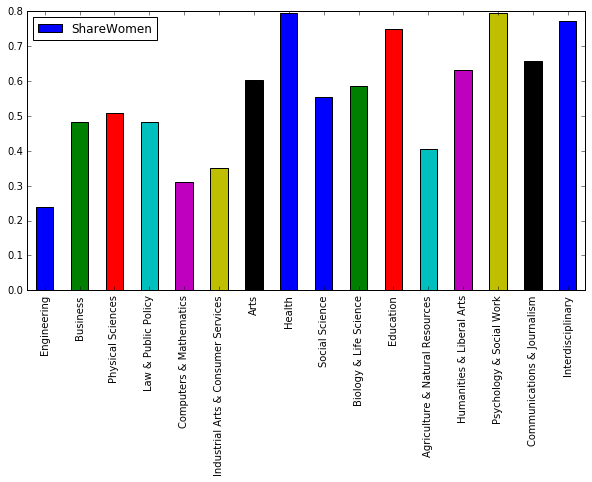

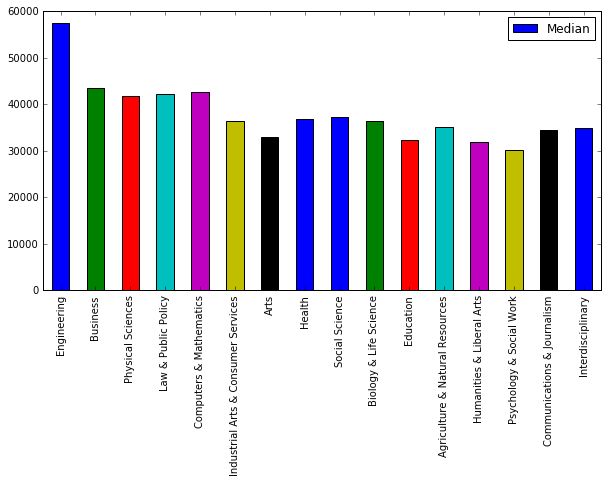

In [76]:
#create a bar plot for column averages in each category
for column in columns:
    category_df.plot.bar(y=column, figsize=(10,5))

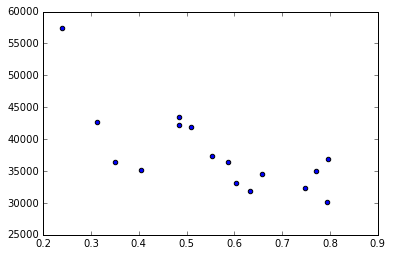

In [80]:
#scatter plot comparing median and sharewomen grouped by category
fig, ax = plt.subplots()
ax.scatter(category_df['ShareWomen'], category_df['Median'])

#as the ratio of women:total increases across 
#categories, median salary decreases.